In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mc
from collections import OrderedDict

%config InlineBackend.figure_format = 'retina'
sc.settings.verbosity = 0
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Plot cell type proportions on spot data

In [4]:
outdir = os.path.join(os.getcwd(), 'Simulation_MERFISH/S2R1/')

In [5]:
ad_spot_roi_path = os.path.join(outdir, 'spotsize_100', 'simulated_mousebrain_spotsize_100_MERFISH_roi.h5ad')
ad_spot = sc.read_h5ad(ad_spot_roi_path)


from scipy.spatial.transform import Rotation as R
r = R.from_euler('z', 12, degrees=True)
rm = r.as_matrix()[:2,:2]
xy = ad_spot.obsm['spatial']
xyr = xy @ rm
ad_spot.obsm['spatial_ori'] = xy
ad_spot.obsm['spatial'] = xyr

In [6]:
ad_sc_path = os.path.join(outdir, 'spotsize_100', 'predicted_simulated_mousebrain_spotsize_100_MERFISH_single_cell_input_1.h5ad')
ad_sc = sc.read_h5ad(ad_sc_path)

In [7]:
ad_sc

AnnData object with n_obs × n_vars = 8597 × 483
    obs: 'major leiden', 'spot_barcodes', 'x', 'y', 'mean_gray', 'std_gray', 'entropy_img', 'leiden', 'region', 'spot_heterogeneity_cv', 'node_weights'
    var: 'highly_variable'
    uns: 'all_cells_in_spot', 'cell_image_props', 'knn', 'leiden_colors', 'log1p', 'region_colors', 'snn'
    obsm: 'X_vae', 'spatial', 'spatial_ori'
    layers: 'X_counts', 'X_decoded', 'X_sum', 'knn_1', 'snn_genemode_10', 'snn_genemode_10_corr', 'snn_genemode_20', 'snn_genemode_20_corr', 'snn_reducedmode_10', 'snn_reducedmode_10_corr', 'snn_reducedmode_20', 'snn_reducedmode_20_corr'
    obsp: 'knn_connectivities', 'snn_connectivities', 'snn_knn_connectivities'

In [7]:
def get_spot_deconvolution(ad, cell_group_key='clusters'):
    hetero_spot = {}

    for spot, cells in ad.uns['all_cells_in_spot'].items():
        cells = [c for c in cells if c in ad.obs_names]
        cell_types_in_spot = ad.obs[cell_group_key][cells]

        if len(cell_types_in_spot) > 0:
            hetero_spot[spot] = cell_types_in_spot.value_counts(normalize=True)

    return pd.DataFrame(hetero_spot)

df = get_spot_deconvolution(ad_sc, cell_group_key='region')

In [8]:
ad_spot

AnnData object with n_obs × n_vars = 535 × 483
    obs: 'major leiden', 'region'
    uns: 'all_cells_in_spot'
    obsm: 'spatial', 'spatial_ori'
    layers: 'X_sum'

In [31]:
df.to_csv(os.path.join(outdir, 'spotsize_100', 'deconvolution_result.csv'))

In [9]:
import stlearn as st 

st.add.add_deconvolution(ad_spot,annotation_path=os.path.join(outdir, 'spotsize_100', 'deconvolution_result.csv'))

In [10]:
ad_spot.obsm['deconvolution']

HPC  HPC_CA1  HPC_CA2/3  HPC_DG    Others  PIA_dorsal  \
SPOT_29_26  0.000000      0.0        0.0     0.0  0.714286    0.000000   
SPOT_30_26  0.187500      0.0        0.0     0.0  0.250000    0.000000   
SPOT_30_25  0.130435      0.0        0.0     0.0  0.130435    0.130435   
SPOT_29_25  0.000000      0.0        0.0     0.0  1.000000    0.000000   
SPOT_32_15  0.625000      0.0        0.0     0.0  0.000000    0.000000   
...              ...      ...        ...     ...       ...         ...   
SPOT_65_20  0.190476      0.0        0.0     0.0  0.333333    0.000000   
SPOT_65_21  0.166667      0.0        0.0     0.0  0.166667    0.000000   
SPOT_66_20  0.100000      0.0        0.0     0.0  0.750000    0.000000   
SPOT_66_21  0.111111      0.0        0.0     0.0  0.555556    0.000000   
SPOT_65_19  0.142857      0.0        0.0     0.0  0.714286    0.000000   

            THAL_latHabenula  THAL_medHabenula  THAL_venmedial/lateral  \
SPOT_29_26               0.0               0.0                 0.00000   
SPOT_30_26               0.0               0.0                 0.25000   
SPOT_30_25               0.0               0.0                 0.26087   
SPOT_29_25               0.0               0.0                 0.00000   
SPOT_32_15               0.0               0.0                 0.00000   
...                      ...               ...                     ...   
SPOT_65_20               0.0               0.0                 0.00000   
SPOT_65_21               0.0               0.0                 0.00000   
SPOT_66_20               0.0               0.0                 0.00000   
SPOT_66_21               0.0               0.0                 0.00000   
SPOT_65_19               0.0               0.0                 0.00000   

            VENTRICLE  WM_dorsal  WM_ventral  chpl  
SPOT_29_26   0.000000   0.000000    0.285714   0.0  
SPOT_30_26   0.000000   0.062500    0.250000   0.0  
SPOT_30_25   0.000000   0.086957    0.260870   0.0  
SPOT_29_25   0.000000   0.000000    0.000000   0.0  
SPOT_32_15   0.000000   0.000000    0.375000   0.0  
...               ...        ...         ...   ...  
SPOT_65_20   0.000000   0.000000    0.476190   0.0  
SPOT_65_21   0.083333   0.083333    0.500000   0.0  
SPOT_66_20   0.000000   0.000000    0.150000   0.0  
SPOT_66_21   0.000000   0.000000    0.333333   0.0  
SPOT_65_19   0.000000   0.000000    0.142857   0.0  

[535 rows x 13 columns]

In [8]:
palette_region = {
    'HPC': '#1f77b4',
    'HPC_CA1': '#ff7f0e',
    'HPC_CA2/3': '#279e68',
    'HPC_DG': '#d62728',
    'Others': '#aec7e8',
    'PIA_dorsal': '#8c564b',
    'THAL_latHabenula': '#e377c2',
    'THAL_medHabenula': '#ffbb78',
    'THAL_venmedial/lateral': '#17becf',
    'VENTRICLE': '#aa40fc',
    'WM_dorsal': '#b5bd61',
    'WM_ventral': '#98df8a',
    'chpl': '#ff9896'
    }

In [ ]:
import matplotlib as mpl

def deconvolution_plot(
    adata,
    library_id: str = None,
    use_label: str = "louvain",
    cluster: [int, str] = None,
    celltype: str = None,
    celltype_threshold: float = 0,
    data_alpha: float = 1.0,
    threshold: float = 0.0,
    palette: dict = None,  # The colors to use for each label...
    tissue_alpha: float = 1.0,
    title: str = None,
    spot_size = 10,
    show_axis: bool = False,
    show_legend: bool = True,
    show_donut: bool = True,
    cropped: bool = True,
    margin: int = 100,
    name: str = None,
    dpi: int = 150,
    output: str = 'pie_plot.pdf',
    copy: bool = False,
    figsize: tuple = (6.4, 4.8),
    show=True,
):

    """\
    Clustering plot for sptial transcriptomics data. Also it has a function to display trajectory inference.

    Parameters
    ----------
    adata
        Annotated data matrix.
    library_id
        Library id stored in AnnData.
    use_label
        Use label result of cluster method.
    list_cluster
        Choose set of clusters that will display in the plot.
    data_alpha
        Opacity of the spot.
    tissue_alpha
        Opacity of the tissue.
    spot_size
        Size of the spot.
    show_axis
        Show axis or not.
    show_legend
        Show legend or not.
    show_donut
        Whether to show the donut plot or not.
    show_trajectory
        Show the spatial trajectory or not. It requires stlearn.spatial.trajectory.pseudotimespace.
    show_subcluster
        Show subcluster or not. It requires stlearn.spatial.trajectory.global_level.
    name
        Name of the output figure file.
    dpi
        DPI of the output figure.
    output
        Save the figure as file or not.
    copy
        Return a copy instead of writing to adata.
    Returns
    -------
    Nothing
    """

    # plt.rcParams['figure.dpi'] = dpi

    imagecol = adata.obsm['spatial'][:, 0]
    imagerow = adata.obsm['spatial'][:, 1]

    fig, ax = plt.subplots(figsize=figsize)

    label = adata.obsm["deconvolution"].T

    tmp = label.sum(axis=1)
    print(tmp)
    
    label_filter = label.loc[tmp[tmp >= np.quantile(tmp, threshold)].index]

    base = adata.obsm['spatial']

    if celltype is not None:
        base = base.loc[
            adata.obs_names[adata.obsm["deconvolution"][celltype] > celltype_threshold]
        ]

    label_filter_ = label_filter.copy()
    colors = label_filter.index.map(palette)

    for i, xy in enumerate(base):
        _ = ax.pie(
            label_filter_.T.iloc[i].values,
            colors=colors,
            center=(xy[0], xy[1]),
            radius=spot_size,
            frame=True,
        )
    ax.autoscale()


    if show_donut:
        ax_pie = fig.add_axes([0.5, -0.4, 0.03, 0.5])

        def my_autopct(pct):
            return ("%1.0f%%" % pct) if pct >= 4 else ""

        ax_pie.pie(
            label_filter_.sum(axis=1),
            colors=colors,
            radius=10,
            # frame=True,
            autopct=my_autopct,
            pctdistance=1.1,
            startangle=90,
            wedgeprops=dict(width=(3), edgecolor="w", antialiased=True),
            textprops={"fontsize": 5},
        )
    
    ax.axis("off")

    if cropped:
        ax.set_xlim(imagecol.min() - margin, imagecol.max() + margin)

        ax.set_ylim(imagerow.min() - margin, imagerow.max() + margin)

        ax.set_ylim(ax.get_ylim()[::-1])

        # plt.gca().invert_yaxis()

    if name is None:
        name = use_label

    if output is not None:
        fig.savefig(output, dpi=dpi, bbox_inches="tight", pad_inches=0)

    if show:
        plt.show()


HPC                       206.614677
HPC_CA1                    32.463116
HPC_CA2/3                  39.460334
HPC_DG                     34.180265
Others                     43.188039
PIA_dorsal                 14.632737
THAL_latHabenula            5.530034
THAL_medHabenula           18.546323
THAL_venmedial/lateral     52.380534
VENTRICLE                   4.099424
WM_dorsal                  11.501713
WM_ventral                 65.651446
chpl                        6.751359
dtype: float64


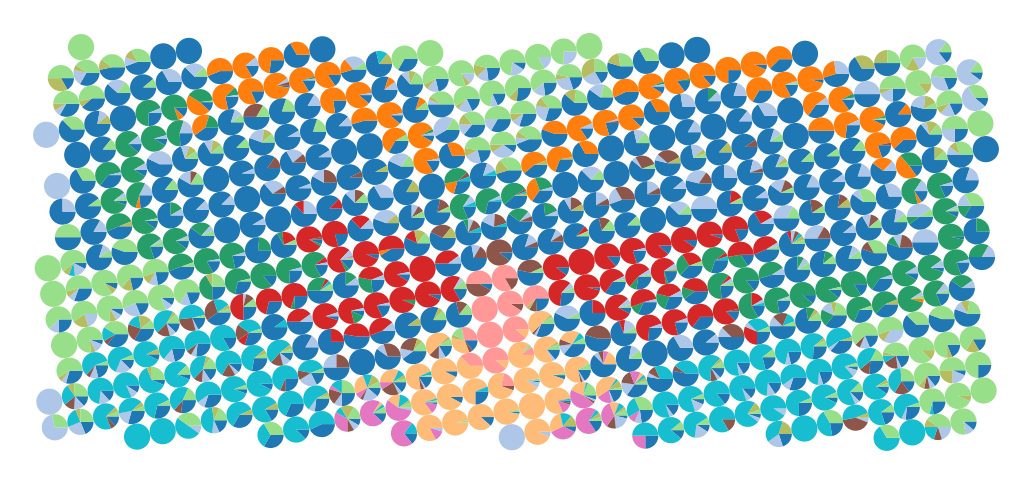

In [ ]:
deconvolution_plot(ad_spot,threshold=0.05, spot_size=50, palette=palette_region, use_label='region', show=True, show_donut=False, dpi=300, output='pie_plot.pdf')

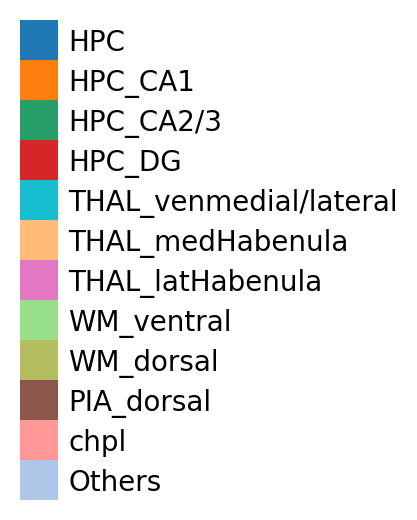

In [ ]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


my_order = ['HPC', 'HPC_CA1', 'HPC_CA2/3', 'HPC_DG', 'THAL_venmedial/lateral', 'THAL_medHabenula', 'THAL_latHabenula', 'WM_ventral', 'WM_dorsal', 'PIA_dorsal', 'chpl', 'Others'][::-1]

color_vals = list(range(0,12,1))

my_colors = [palette_region[c] for c in my_order]
my_cmap = ListedColormap(my_colors)
my_norm = mpl.colors.Normalize(0, 12)
#my_cmap =  mpl.cm.get_cmap(cmap, len(color_vals))

fig = plt.figure()
ax_cb = fig.add_axes([0.9, 0.25, 0.03, 0.5], axisbelow=False)
cb = mpl.colorbar.ColorbarBase(
    ax_cb, cmap=my_cmap, norm=my_norm, ticks=color_vals
)

cb.ax.tick_params(size=0)
loc = np.array(color_vals) + 0.5
cb.set_ticks(loc)
cb.set_ticklabels(my_order)
cb.outline.set_visible(False)

In [41]:
def visNet(net, coor, figsize=(5,5), xlim=None, ylim=None, out=None, *args, **kwds):
    import matplotlib.pyplot as plt
    import networkx as nx

    fig, ax = plt.subplots(figsize=figsize)
    nx.draw(net, coor, ax=ax, **kwds)
    ax.invert_yaxis()
    plt.xlim(xlim)
    plt.ylim(ylim)

    if out is not None:
        plt.savefig(out, dpi=300)
    return fig


def plot_cell_graph(adata, conn_key='snn', *args, **kwds):

    import matplotlib.colors as mc
    import networkx as nx

    try:
        adj = adata.obsp[conn_key] 
    except KeyError:
        adj = adata.obsp[f'{conn_key}_connectivities']

    G=nx.from_numpy_matrix(adj)

    coor = adata.obsm['spatial'] #* np.array([1, -1])

    node_degree = np.array(list(dict(G.degree).values()))
    edge_weight = np.array([G.edges[e]['weight'] for e in G.edges])

    fig = visNet(G, coor, node_size=node_degree/10, width=edge_weight/10, *args, **kwds)
    return fig

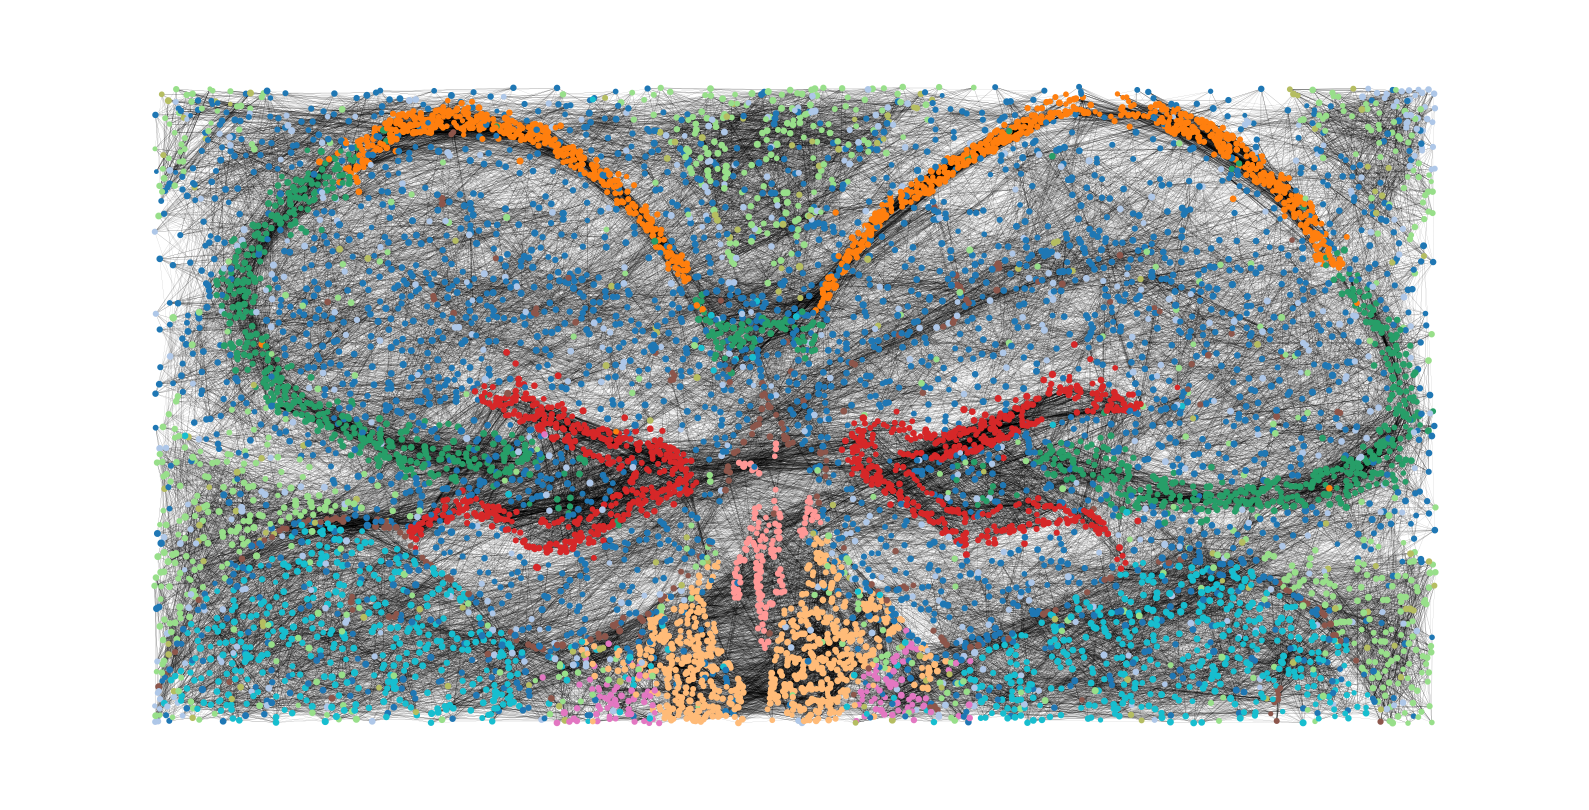

In [ ]:

ad_sc_roi = ad_sc[ad_sc.obs['region'].isin(my_order)]
fig = plot_cell_graph(
    ad_sc_roi, 
    conn_key='snn', 
    figsize=(10,5), 
    node_color=ad_sc_roi.obs['region'].map(palette_region)
    )

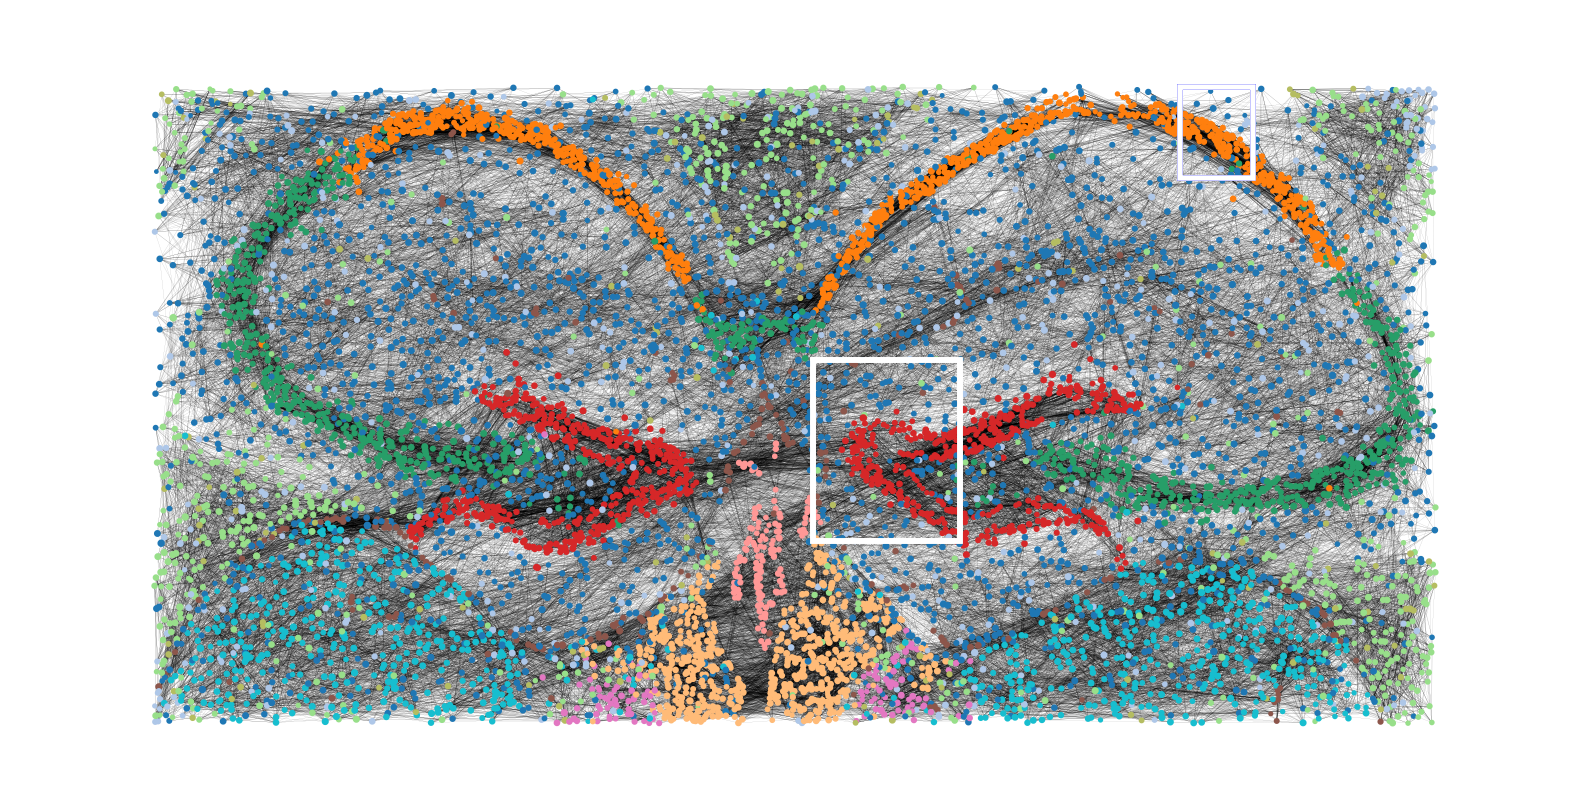

In [ ]:
import matplotlib.patches as patches
zoom_region1 = [5800, 6200, 1400, 1800]
zoom_region2 = [6800, 7000, 800, 1000]

rect1 = patches.Rectangle(
    (zoom_region1[0], zoom_region1[2]), zoom_region1[1]-zoom_region1[0], zoom_region1[3]-zoom_region1[2], 
    linewidth=2, 
    edgecolor='w', 
    facecolor='none', 
    zorder=2)

ax = fig.gca()
# Add the patch to the Axes
ax.add_patch(rect)

rect2 = patches.Rectangle(
    (zoom_region2[0], zoom_region2[2]), zoom_region2[1]-zoom_region2[0], zoom_region2[3]-zoom_region2[2], 
    linewidth=2, 
    edgecolor='w', 
    facecolor='none', 
    zorder=2)
ax = fig.gca()
ax.add_patch(rect)

fig

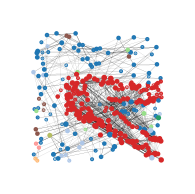

In [ ]:
ad_zoom = sc_plot_region(ad_sc_roi, zoom_region1)
plot_cell_graph(ad_zoom, conn_key='snn', figsize=(1,1), node_color=ad_zoom.obs['region'].map(palette_region), out='NearDG.pdf')

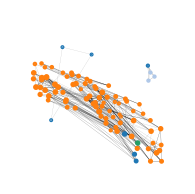

In [ ]:
ad_zoom = sc_plot_region(ad_sc_roi, zoom_region2)
plot_cell_graph(ad_zoom, conn_key='snn', figsize=(1,1), node_color=ad_zoom.obs['region'].map(palette_region), out='CA1.pdf')